---

# Project: Customer Demand Analysis For Delivery App

## Introduction
In this project, we will perform an exploratory data analysis (EDA) on sample data from an online food ordering and delivery app of New York restaurants.

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Dictionary

The data contains the different data related to a food order. The detailed data dictionary is given below.

* **order_id**: Unique ID of the order
* **customer_id**: ID of the customer who ordered the food
* **restaurant_name**: Name of the restaurant
* **cuisine_type**: Cuisine ordered by the customer
* **cost**: Cost of the order
* **day_of_the_week**: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* **rating**: Rating given by the customer out of 5
* **food_preparation_time**: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* **delivery_time**: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

---

## Importing Necessary Libraries and Data

This section sets up the environment by importing tools for data manipulation, visualization, handling special characters, and conducting statistical analysis

In [3047]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3048]:
# Import library to suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [3049]:
# Import libariers for special characters
import re 

# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import libaries for statistical analysis
import scipy.stats as stats

## Loading Data

This section involves reading the dataset from a CSV file into a pandas DataFrame for further analysis.

In [3050]:
# Read the DataFrame
df = pd.read_csv("foodhub_order.csv")

## Data Overview

This section provides a high-level summary of the DataFrame, including the dimensions, data types, and an initial look at the first and last few rows. It checks for duplicate records and counts the unique values for each feature, confirming data integrity and providing an overview of the dataset’s structure.

### High-Level Data Information

In [3051]:
# Number of rows and columns
df.shape

(1898, 9)

In [3052]:
# First 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [3053]:
# Last 5 rows
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


In [3054]:
# Summary of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


**Observations:**
- The DataFrame has **1,898 observations and 9 columns**.
- Data types include int64, object, and float64.
- No missing values, as row counts match non-null counts for each column.
- The 'rating' column is an object data type due to 'Not given' string entries.

### Unique and Duplicate Values

In [3055]:
# Number of duplicate rows
dvalues = df.duplicated().sum()

# Convert into DataFrame
duplicate_df = pd.DataFrame({"Metric": ["Duplicate Rows"], "Count": [dvalues]})

# Display DataFrame
duplicate_df

,Metric,Count
0,Duplicate Rows,0


In [3056]:
# Number of unique values per feature
nuniq = df.nunique().reset_index()

# Rename column names
nuniq.columns = ["Feature", "Unique Values"]

# Display DataFrame
nuniq

,Feature,Unique Values
0,order_id,1898
1,customer_id,1200
2,restaurant_name,178
3,cuisine_type,14
4,cost_of_the_order,312
5,day_of_the_week,2
6,rating,4
7,food_preparation_time,16
8,delivery_time,19


**Observations**:
- **Duplicate Records**: The dataset is free of duplicate entries, ensuring the integrity of the data.
- **Order and Customer Data:** There are 1,898 orders made by 1,200 customers.
- **Restaurant and Cuisine Data:** The dataset includes 178 restaurants and 14 cuisine types.
- **Additional Details:** More insights and specifics are provided in the subsequent sections.

## Data Preprocessing

This section focuses on cleaning and preparing the data for subsequent analysis. Entries of categorical features with special characters are identified and corrected, and new features are computed and added to the DataFrame.

### Special Characters

In [3057]:
# Unique restaurant names
lst_rn = df.restaurant_name.unique()


# Function to check for special characters
def contains_special_char(s):
    special_char_pattern = re.compile(r"[^a-zA-Z0-9_! '&.-]")
    return bool(special_char_pattern.search(s))


# List of unique restaurant names with special characters
strings_with_special_chars = [s for s in lst_rn if contains_special_char(s)]

# Convert to DataFrame
pd.DataFrame(strings_with_special_chars, columns=["restaurant_name"])

,restaurant_name
0,Big Wong Restaurant _¤¾Ñ¼
1,Empanada Mama (closed)
2,Chipotle Mexican Grill $1.99 Delivery
3,Joe's Shanghai _Àü£¾÷´
4,CafÌ© China
5,Dirty Bird To Go (archived)
6,DespaÌ±a


In [3058]:
# List of corrected restaurant names
replacement_list = [
    "Big Wong Restaurant",
    "Empanada Mama",
    "Chipotle Mexican Grill",
    "Joes Shanghai",
    "Cafe Chine",
    "Dirty Bird To Go",
    "Despana",
]

# Dictionary of restaurant names with special characters and the corrected version
replacement_dict = dict(zip(strings_with_special_chars, replacement_list))

# Replace values in the DataFrame using the dictionary
df["restaurant_name"] = df["restaurant_name"].replace(replacement_dict)

**Observations:**
- Out of all categorical features, only one exhibits the presence of special characters. 
- In total, 7 restaurant names exhibit special characters.
- Updated the 'restaurant_name' column by replacing names with special characters using a predefined replacement list.

### Feature Engineering

In [3059]:
# Compute the total order completion time for each order
order_completion_time = df["food_preparation_time"] + df["delivery_time"]

# Add new column to DataFrame and set dtype to 'int64'
df["order_completion_time"] = order_completion_time.astype("int64")

In [3060]:
# Summary of DataFrame | # Re-evaluate with the new column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   order_completion_time  1898 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 148.4+ KB


**Observations:**
- A new feature was added to the DataFrame, representing the sum of food preparation and delivery time per order.
- This feature is of type 'int64' and contains no missing values.

## Exploratory Data Analysis

### Statistical Analysis of DataFrame

In [3061]:
# Select numerical and categorical columns of DataFrame
num_cols = list(df.select_dtypes(include=[np.number]).columns)
cat_cols = list(df.select_dtypes(include=["object"]).columns)

#### Analysis of Numerical Data

In [3062]:
# Statistical summary of numerical data
df[num_cols[2::]].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.0,16.50,7.48,4.47,12.08,14.14,22.3,35.41
food_preparation_time,1898.0,27.37,4.63,20.00,23.00,27.00,31.0,35.00
delivery_time,1898.0,24.16,4.97,15.00,20.00,25.00,28.0,33.00
order_completion_time,1898.0,51.53,6.83,35.00,47.00,52.00,56.0,68.00


**Observations:**
- **cost_of_the_order**: Right-skewed distribution indicated by a higher mean than median, with high variability (standard deviation: \\$7.48).
- **food_preparation_time**: Slightly right-skewed distribution with the mean slightly higher than the median, showing moderate variability (standard deviation: 4.63 minutes).
- **delivery_time**: Slightly left-skewed distribution with the mean lower than the median, exhibiting moderate variability (standard deviation: 4.97 minutes).
- **order_completion_time**: Slightly left-skewed distribution with the mean lower than the median, displaying relatively high variability (standard deviation: 6.83 minutes).

#### Analysis of Categorical Data

In [3063]:
# Statistical summary of categorical data
df[cat_cols].describe().T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


**Observations:**
- **restaurant_name**: There are 178 unique restaurants, with Shake Shack being the most frequent, receiving 219 orders.
- **cuisine_type**: There are 14 unique cuisine types, with American cuisine being the most common, with a total of 584 orders.
- **day_of_the_week**: There are 2 unique entries, with the majority of orders placed on weekends, indicating higher demand during this period.
- **rating**: There are 4 unique ratings, with 736 instances where the rating is labelled as ‘Not given’.

### Defintion of Functions

This subsection defines all the necessary functions for subsequent data analysis, including calculating statistical summaries, value counts with associated percentage distributions, and plotting various visualizations.

In [3064]:
# Function to calculate the counts and percentage distribution of unique values for any categorical feature
def fstats(data, feature, n=None):
    """
    Calculate the counts and percentage distribution of unique values in a specified feature.

    Parameters:
    - data (DataFrame): The input DataFrame.
    - feature (str): The column name for which the statistics are calculated.
    - n (int, optional): The number of top results to return. If None, return all results.

    Returns:
    - DataFrame: A DataFrame containing the counts and percentages of unique values.
    """
    counts = data[feature].value_counts()
    percentages = data[feature].value_counts(normalize=True).mul(100).round(2)

    fstats_df = pd.DataFrame(
        {
            feature: counts.index,
            "count": counts.values,
            "percentage": percentages.values,
        }
    ).reset_index(drop=True)

    return fstats_df.head(n)

In [3065]:
# Function to filter DataFrame and calculate the counts and percentage distribution of unique values for any categorical feature
def compute_stats(df, feature, filter_column, filter_value, ascending_sort=False):
    """
    Filter DataFrame and compute the counts and percentage distribution of unique values in a specified feature.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    feature (str): The categorical feature to analyze.
    filter_column (str): The column to filter by.
    filter_value (str): The value to filter on.
    ascending_sort (bool): Sort order for the counts. Default is False (descending).

    Returns:
    pd.DataFrame: A DataFrame with counts and percentages of the specified feature.
    """
    # Filter data by the specified column and value
    filtered_df = df[df[filter_column] == filter_value]

    # Compute counts
    counts = filtered_df[feature].value_counts(ascending=ascending_sort)

    # Compute percentages
    total_counts = counts.sum()
    percentages = (counts / total_counts * 100).round(2)

    # Combine counts and percentages into a DataFrame
    combined_counts = pd.DataFrame(
        {
            f"{filter_value.lower()}_counts": counts,
            f"{filter_value.lower()}_percentage": percentages,
        }
    ).fillna(0)

    return combined_counts.reset_index()

In [3066]:
# Function to calculate and display the mean values of a feature grouped by another feature
def fstatsmean(data, gbfeatures, features):
    """
    Calculate and display the mean and standard deviation of specified features
    grouped by another feature.

    Parameters:
    - data (pd.DataFrame): The input DataFrame containing the data.
    - gbfeatures (str or list): The feature(s) to group by.
    - features (str or list): The feature(s) for which to calculate the mean and standard deviation.

    Returns:
    - pd.DataFrame: A DataFrame with the grouped means and standard deviations, rounded to 2 decimal places.
    """
    filtered_df = data.groupby(gbfeatures)[features]

    fstats = filtered_df.agg(["mean", "std"]).round(2)
    return fstats.reset_index()

In [3067]:
# Function to display the distribution of a categorical feature
def plot_count(data, feature, figsize=(14, 8)):
    """
    Display the distribution of a categorical feature in a horizontal count plot.

    Parameters:
    - data (DataFrame): The input DataFrame.
    - feature (str): The column name for which the distribution is plotted.
    - figsize (tuple, optional): The size of the figure. Default is (12, 7).

    Returns:
    - None: The function displays the plot.
    """
    # Sort the order
    sorted_count = df[feature].value_counts().sort_values(ascending=False)

    # Plot countplot
    plt.figure(figsize=figsize)
    sns.countplot(
        data=data,
        y=feature,
        hue=feature,
        order=sorted_count.index,
        hue_order=sorted_count.index,
    )

    # Add title
    formatted_title = feature.replace("_", " ").title()
    plt.title(f"Distribution of {formatted_title}s")
    plt.grid(axis="x", linestyle="--", linewidth=0.5)

    plt.tight_layout(pad=2.0)
    plt.show()

In [3068]:
# Function to display the distribution, potential outliers and statistical summary of a numerical feature 
def plot_histbox(data, feature, figsize=(14,8)):
    """
    Display the distribution and outliers of a numerical feature using a histogram and boxplot.

    Parameters:
    - data (DataFrame): The input DataFrame.
    - feature (str): The column name for which the distribution and outliers are plotted.
    - figsize (tuple, optional): The size of the figure. Default is (12, 7).

    Returns:
    - None: The function displays the plots and prints key statistics.
    """
    # Obtain summary statistic of feature
    fstats = df[feature].describe().T
    fstats = fstats.loc[['mean', '50%', 'std', 'min', 'max']].to_dict()
    fstats['median'] = fstats.pop('50%') # Rename the '50%' key to 'median'

    # Plot histogram and boxplot
    fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=figsize, gridspec_kw={'height_ratios': [2, 1]})

    sns.histplot(data, x=feature, kde=True, color='green', edgecolor='darkgreen', linewidth=1.0, ax=ax1)
    sns.boxplot(data, x=feature, color='#FFC877', medianprops=dict(visible=True, color='red'), flierprops=dict(marker='o', markersize=3), ax=ax2)

    # Add lines for max, mean, and median values
    ax1.axvline(fstats['mean'], color='blue', linestyle='-', linewidth=1.5, label=f'Mean: {fstats['mean']:.2f}')
    ax1.axvline(fstats['median'], color='red', linestyle='-', linewidth=1.5, label=f'Median: {fstats['median']:.2f}')

    # Add legend and title
    ax1.legend(loc='upper right')
    formatted_title = feature.replace("_", " ").title()
    ax1.set_title(f"Distribution of {formatted_title}s")

    plt.tight_layout(pad=2.0)
    plt.show()

    # Print the key statistics
    formatted_stats = ', '.join([f"{key.capitalize()}: {value:.2f}" for key, value in fstats.items()])
    print(formatted_stats)

### Univariate Analysis of Categorical Columns

#### Column | restaurant_name

In [3069]:
# Percentage distribution and counts of orders for each restaurant
filtered_df = fstats(df, "restaurant_name")

# Top 5 restaurants in terms of total order volume
top_n = 5
filtered_df.nlargest(top_n, "count")

,restaurant_name,count,percentage
0,Shake Shack,219,11.54
1,The Meatball Shop,132,6.95
2,Blue Ribbon Sushi,119,6.27
3,Blue Ribbon Fried Chicken,96,5.06
4,Parm,68,3.58


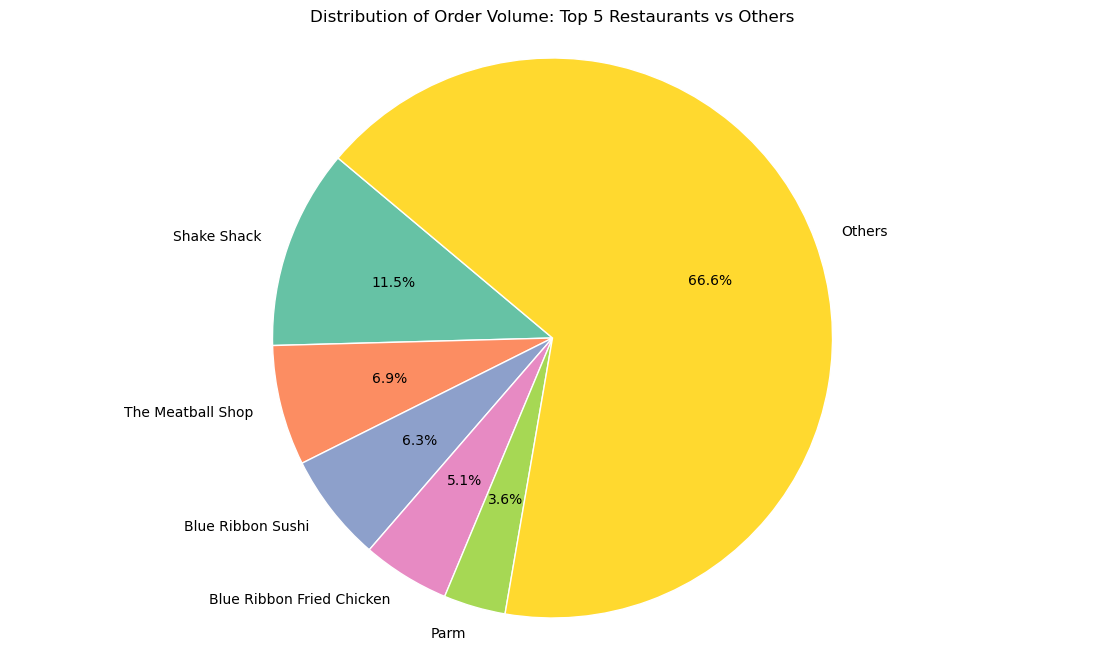

In [3070]:
# Identify the top 5 restaurants and calculate their combined percentage
top_five = filtered_df.nlargest(top_n, "percentage")["percentage"].sum()
rest = 100 - top_five

# Prepare data for the pie chart
labels = list(filtered_df.nlargest(top_n, "percentage")["restaurant_name"]) + ["Others"]
sizes = list(filtered_df.nlargest(top_n, "percentage")["percentage"]) + [rest]

# Visualize the distribution in a pie chart of the 'restaurant_name' feature by order volume
plt.figure(figsize=(14, 8))
palette_color = sns.color_palette("Set2")
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=140,
    colors=palette_color,
    wedgeprops={"edgecolor": "white"},
)
plt.title(f"Distribution of Order Volume: Top {top_n} Restaurants vs Others")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Observations:**

- The top 5 restaurants by order volume are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.
- Together, these restaurants account for 33.4% of the orders, with Shake Shack alone representing 11.5%.
- The “Others” category, representing the remaining 173 restaurants, comprises 66.6% of the total orders, indicating that the majority of orders are spread among many restaurants outside the top 5.

In [3071]:
# Calculate the percentage of restaurants in each order volume category
total = len(filtered_df["restaurant_name"])

ord_lL = len(filtered_df[filtered_df["count"] < 10])
ord_mL = len(filtered_df[(filtered_df["count"] >= 10) & (filtered_df["count"] <= 50)])
ord_uL = len(filtered_df[filtered_df["count"] > 50])

# Create a list of counts
counts = [ord_lL, ord_mL, ord_uL]

# Calculate the percentages of each category using the map function
percentages = list(map(lambda x: round((x / total) * 100, 2), counts))

# Create a DataFrame with the results
order_volume_df = pd.DataFrame(
    {
        "order_volume_category": ["< 10 orders", "10 <= orders <= 50", "> 50 orders"],
        "percentage": percentages,
    }
)

# Display DataFrame
order_volume_df

,order_volume_category,percentage
0,< 10 orders,76.97
1,10 <= orders <= 50,19.10
2,> 50 orders,3.93


**Observations**:
- Nearly 80.0% of restaurants have fewer than 10 orders, highlighting many low-activity establishments.
- Approximately 19% of restaurants receive between 10 and 50 orders.
- Only a small fraction of restaurants, approximately 4.0% receive 50 or more orders.

#### Column | cuisine_type

In [3072]:
# Percentages and counts of total orders for the 'cuisine_type' feature
fstats(df, "cuisine_type")

,cuisine_type,count,percentage
0,American,584,30.77
1,Japanese,470,24.76
2,Italian,298,15.70
3,Chinese,215,11.33
4,Mexican,77,4.06
5,Indian,73,3.85
6,Middle Eastern,49,2.58
7,Mediterranean,46,2.42
8,Thai,19,1.00
9,French,18,0.95


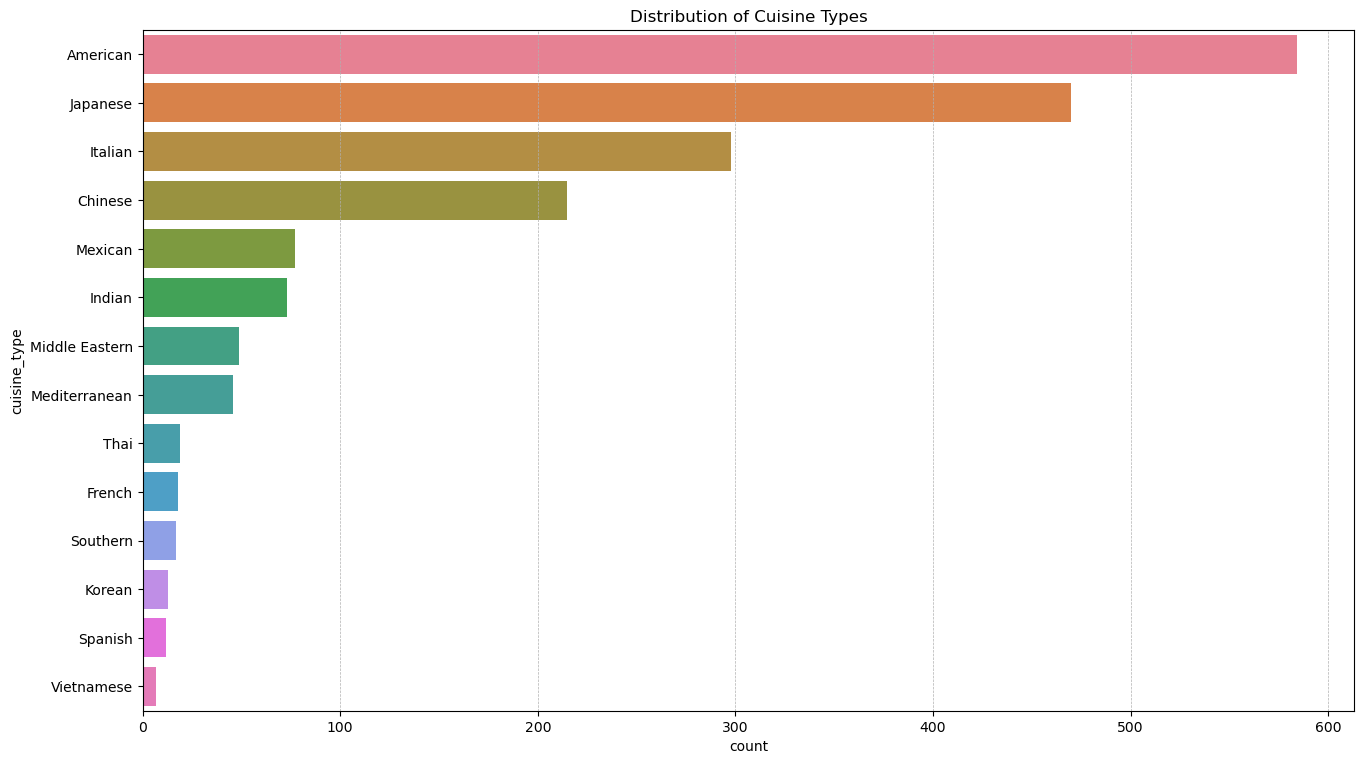

In [3073]:
# Visualize the distribution of the 'cuisine_type' feature
plot_count(df, "cuisine_type")

**Observations**:
- The majority of orders are for American, Japanese, and Italian cuisines, representing 30.77%, 24.76%, and 15.70% of orders respectively.
- Together, these top three cuisines account for 70.84% of all available cuisine options.
- Cuisines like Vietnamese and Spanish have the lowest percentages of orders, with 0.37% and 0.63% respectively.

#### Column | day_of_the_week

In [3074]:
# Percentages and counts of total orders for the 'day_of_the_week' feature
fstats(df, "day_of_the_week")

,day_of_the_week,count,percentage
0,Weekend,1351,71.18
1,Weekday,547,28.82


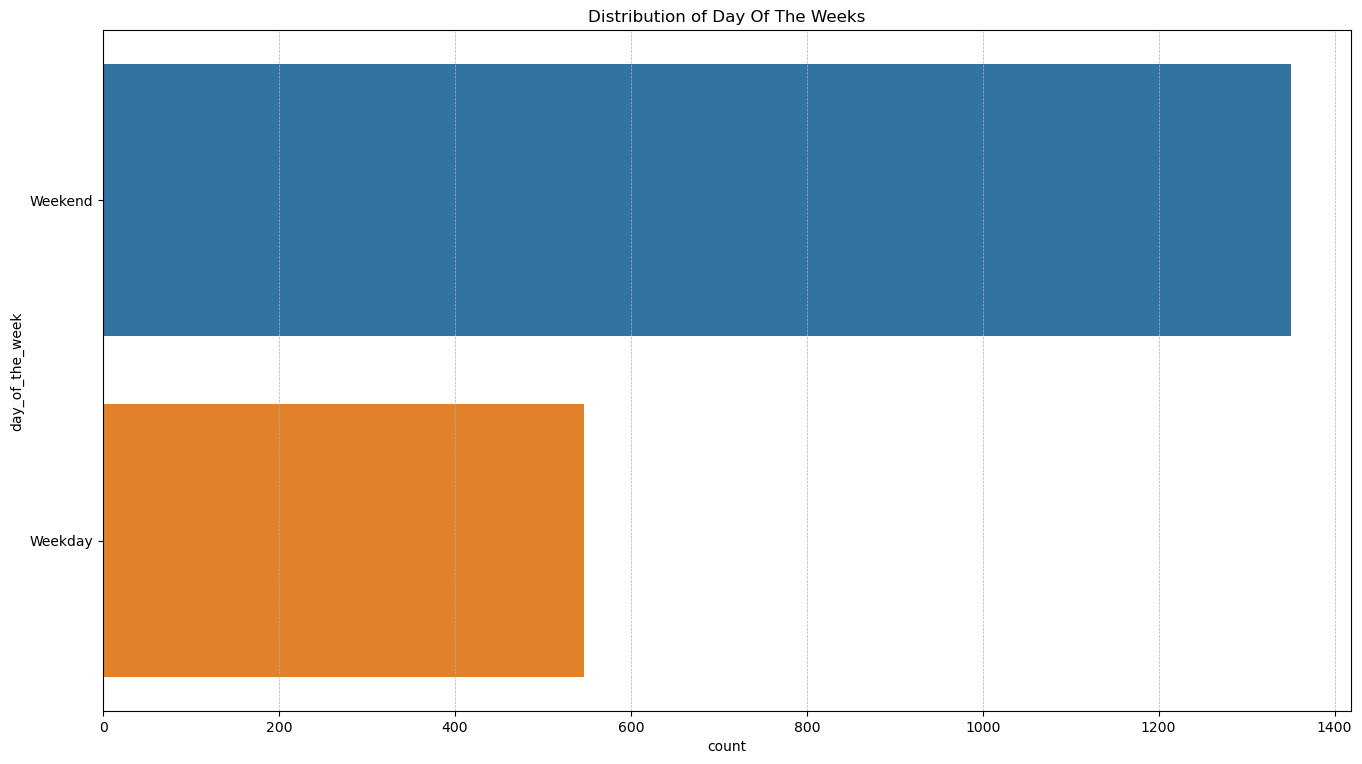

In [3075]:
# Visualize the distribution of the 'day_of_the_week' feature
plot_count(df, "day_of_the_week")

**Observations:**
- Most orders are placed during the weekend, accounting for 71.18% of the total.
- Only 28.82% of orders are made on weekdays.

In [3076]:
# Most popular cuisine on weekdays
compute_stats(df, "cuisine_type", "day_of_the_week", "Weekday")

,cuisine_type,weekday_counts,weekday_percentage
0,American,169,30.90
1,Japanese,135,24.68
2,Italian,91,16.64
3,Chinese,52,9.51
4,Mexican,24,4.39
5,Indian,24,4.39
6,Middle Eastern,17,3.11
7,Mediterranean,14,2.56
8,Southern,6,1.10
9,French,5,0.91


In [3077]:
# Most popular cuisine on weekends
compute_stats(df, "cuisine_type", "day_of_the_week", "Weekend")

,cuisine_type,weekend_counts,weekend_percentage
0,American,415,30.72
1,Japanese,335,24.80
2,Italian,207,15.32
3,Chinese,163,12.07
4,Mexican,53,3.92
5,Indian,49,3.63
6,Mediterranean,32,2.37
7,Middle Eastern,32,2.37
8,Thai,15,1.11
9,French,13,0.96


**Observations:**
- The most popular cuisine on weekends is American, constituting 30.72% of orders, followed by Japanese at 24.8%, and Italian at 15.32%, with the top three cuisines making up 70.84% of orders.
- The most popular cuisine on weekdays is also American, making up 33.98% of orders, followed by Japanese at 27.13%, and Italian at 18.28%, with the top three cuisines comprising 79.39% of orders.

#### Column | rating

In [3078]:
# Percentages and counts of total orders for the 'rating' feature
fstats(df, "rating")

,rating,count,percentage
0,Not given,736,38.78
1,5,588,30.98
2,4,386,20.34
3,3,188,9.91


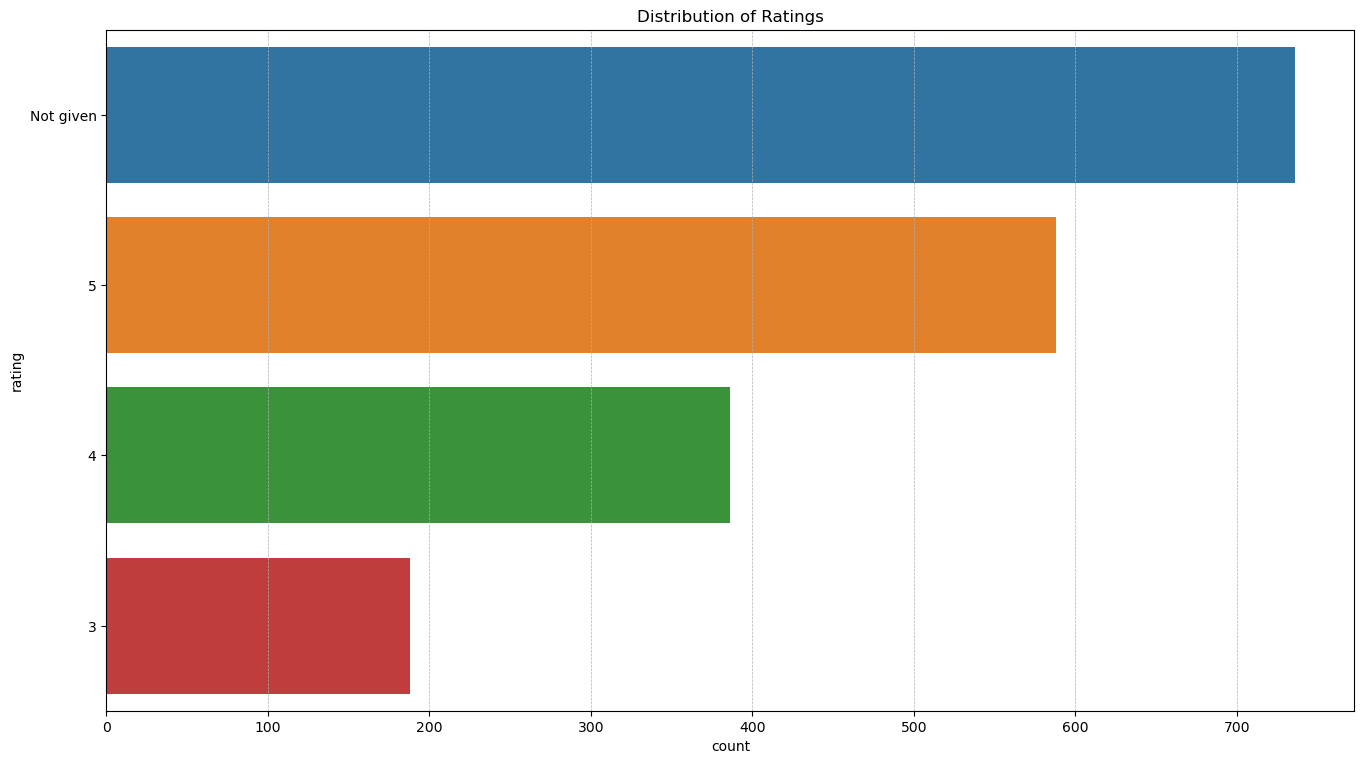

In [3079]:
# Visualize the distribution of the 'rating' feature
plot_count(df, "rating")

In [3080]:
# Replace 'Not given' with NaN and convert the column type to float64
df["rating"] = df["rating"].replace("Not given", np.nan).astype(np.float64)

# Re-evaluate the DataFrame with the updated column
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,order_completion_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,49


**Observations**:
- A considerable number of orders, 38.78%, lacked a provided rating.
- Most of the rated orders were given a 5, constituting 30.98% of the total.
- 'Not given' ratings were replaced by NaN, and the column type was converted to 'float64'.

### Univariate Analysis of Numerical Columns


#### Column | customer_id

In [3081]:
# Calculate the percentage of orders for each customer
top_customers = df["customer_id"].value_counts().reset_index()
top_customers.columns = ["customer_id", "count"]

top_customers["percentage"] = (
    df["customer_id"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .reset_index(drop=True)
)

# Calculate cumulative sum of percentages
top_customers["cum_percentage"] = top_customers["percentage"].cumsum()

# Find the index where the cumulative proportion exceeds 5%
index = top_customers[top_customers["cum_percentage"] <= 5].index[-1] + 1

# Top 5 percent of customers based on total order count
top_customers.loc[:index, ["customer_id", "count", "percentage"]]

,customer_id,count,percentage
0,52832,13,0.68
1,47440,10,0.53
2,83287,9,0.47
3,250494,8,0.42
4,259341,7,0.37
5,82041,7,0.37
6,65009,7,0.37
7,276192,7,0.37
8,97079,6,0.32
9,97991,6,0.32


**Observations**:
- Less than 1% of customers account for a significant number of orders, with their cumulative order percentage quickly exceeding 5%, highlighting a small group of highly active customers.
- This underscores the influence of a few highly active customers on the overall order volume.

#### Column | cost_of_the_order

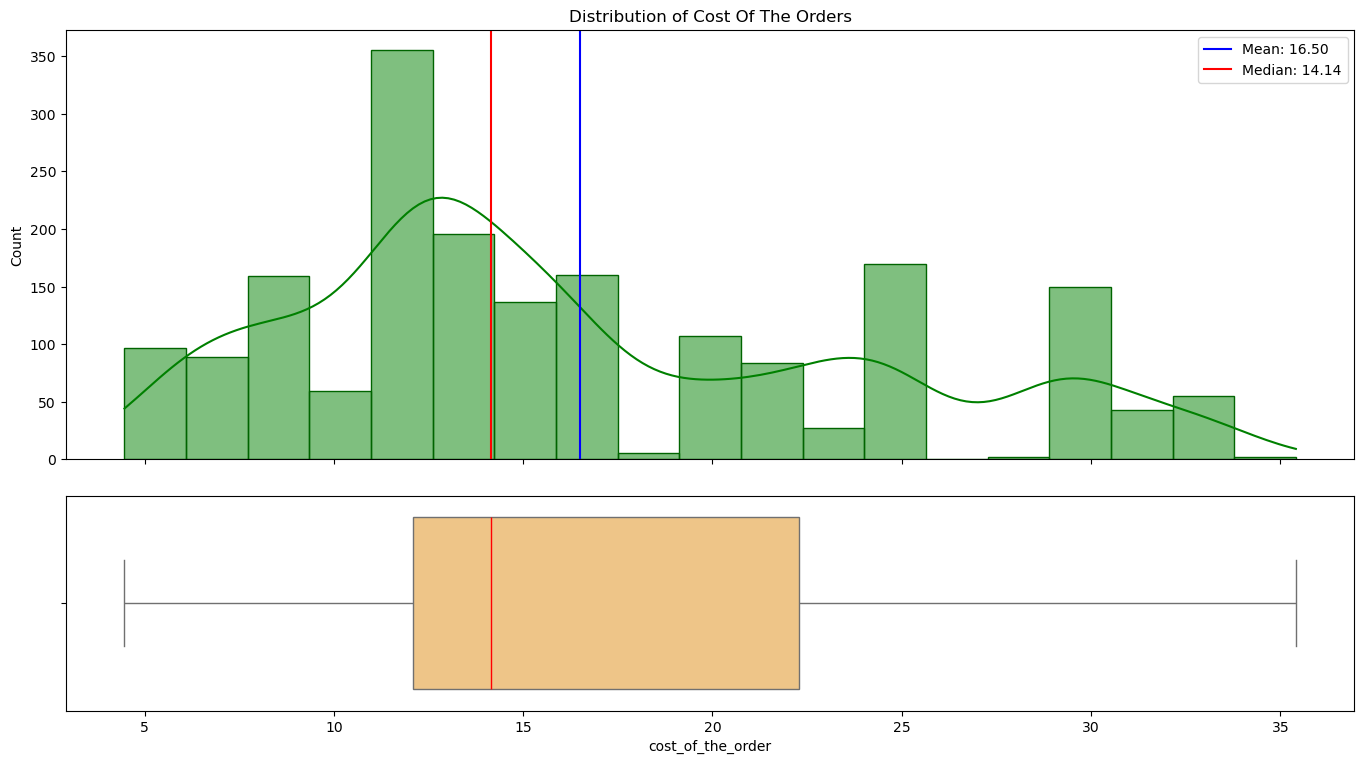

Mean: 16.50, Std: 7.48, Min: 4.47, Max: 35.41, Median: 14.14


In [3082]:
# Visualize the distribution of the 'cost_of_the_order' feature, identify potential outliers (IQR) and genertate key summary statistics
plot_histbox(df, "cost_of_the_order")

**Observations**:

- The distribution is right-skewed with a mean higher than the median and a high standard deviation, indicating wide data variation.
- Order costs range from \\$4.47 to \\$35.41, with an average order cost of \\$16.50 and a standard deviation of \\$7.48.

In [3083]:
# Group and filter data by the specified column
filtered_df = df.groupby("cuisine_type")["cost_of_the_order"]

# Average cost of orders per cuisine type
avg_cost_per_cuisine = (
    filtered_df.mean().sort_values(ascending=False).round(2).reset_index()
)

# Rename column names
avg_cost_per_cuisine.columns = ["cuisine_type", "average_cost_of_the_order"]

# Display DataFrame
avg_cost_per_cuisine

,cuisine_type,average_cost_of_the_order
0,French,19.79
1,Southern,19.30
2,Thai,19.21
3,Spanish,18.99
4,Middle Eastern,18.82
5,Mexican,16.93
6,Indian,16.92
7,Italian,16.42
8,American,16.32
9,Chinese,16.31


**Observations**:
- The highest average cost is for French cuisine at approximately \\$19.79.
- The lowest average cost is for Vietnamese cuisine at approximately \\$12.88.

#### Column | food_preparation_time

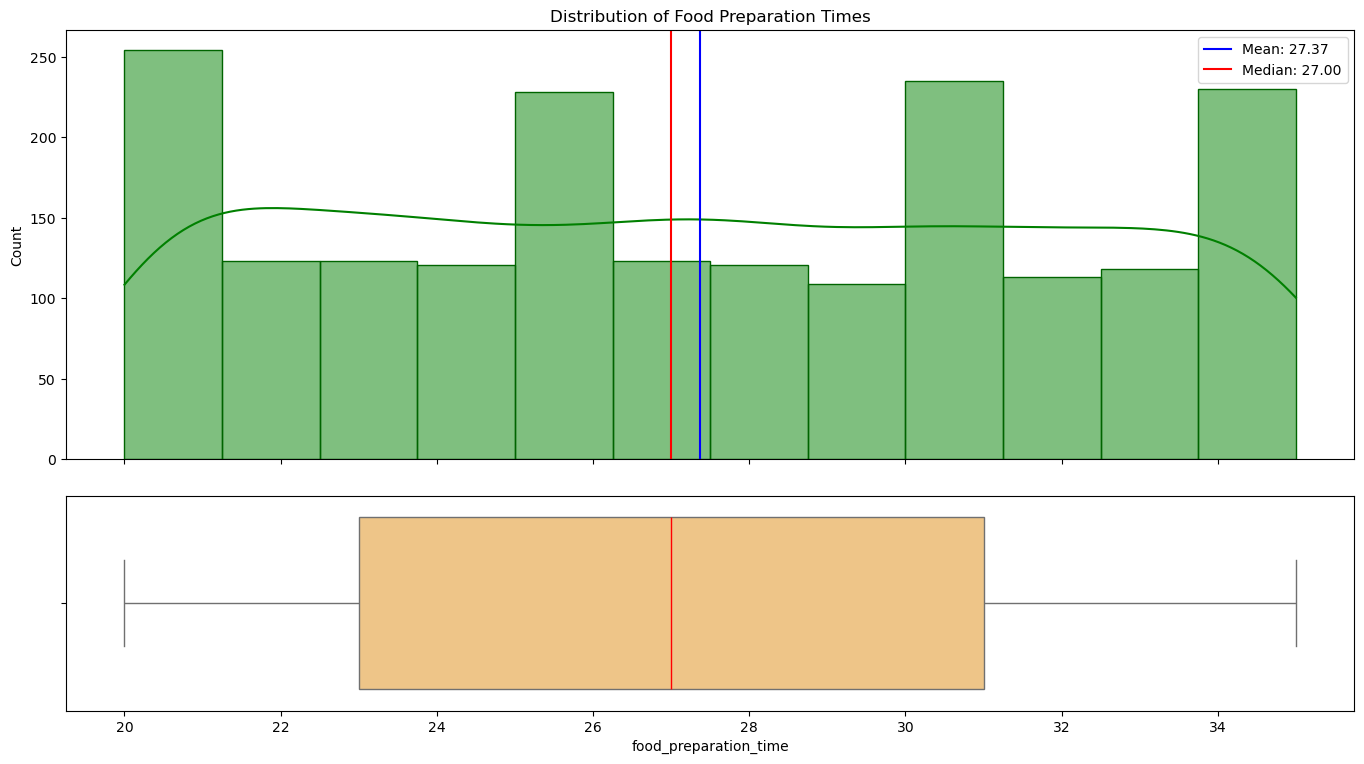

Mean: 27.37, Std: 4.63, Min: 20.00, Max: 35.00, Median: 27.00


In [3084]:
# Visualize the distribution of the 'food_preparation_time' feature, identify potential outliers (IQR) and genertate key summary statistics
plot_histbox(df, "food_preparation_time")

**Observations**:
- The distribution is slightly right-skewed with a mean higher than the median.
- Food preparation times range from 20.0 to 35.0 minutes, with an average time of 27.37 minutes and a standard deviation of approximately 4.63 minutes.

#### Column | delivery_time

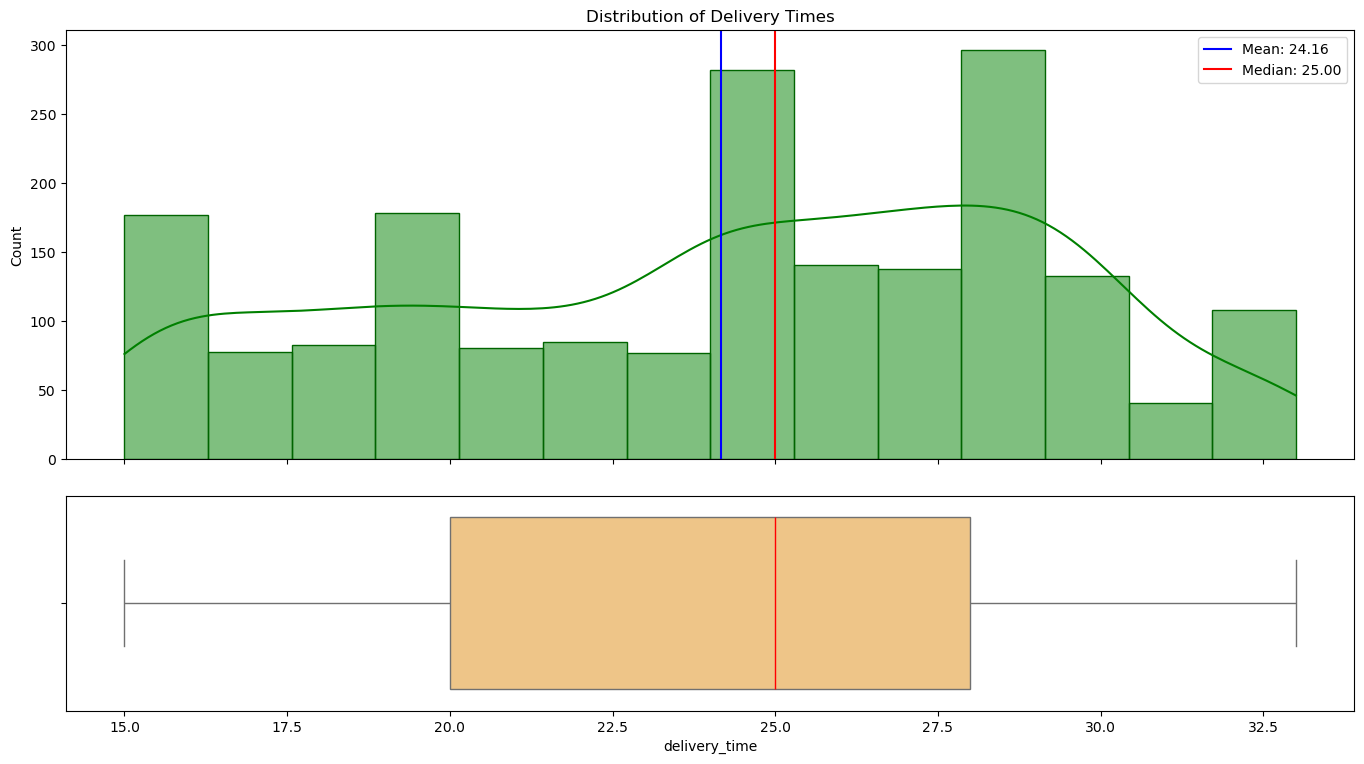

Mean: 24.16, Std: 4.97, Min: 15.00, Max: 33.00, Median: 25.00


In [3085]:
# Visualize the distribution of the 'delivery_time' feature, identify potential outliers (IQR) and genertate key summary statistics
plot_histbox(df, "delivery_time")

**Observations**:
- The distribution is slightly left-skewed, with the mean lower than the median.
- Delivery times range from 15.0 to 33.0 minutes, with an average time of 24.16 minutes and a standard deviation of approximately 4.97 minutes.

#### Column | order_completion_time

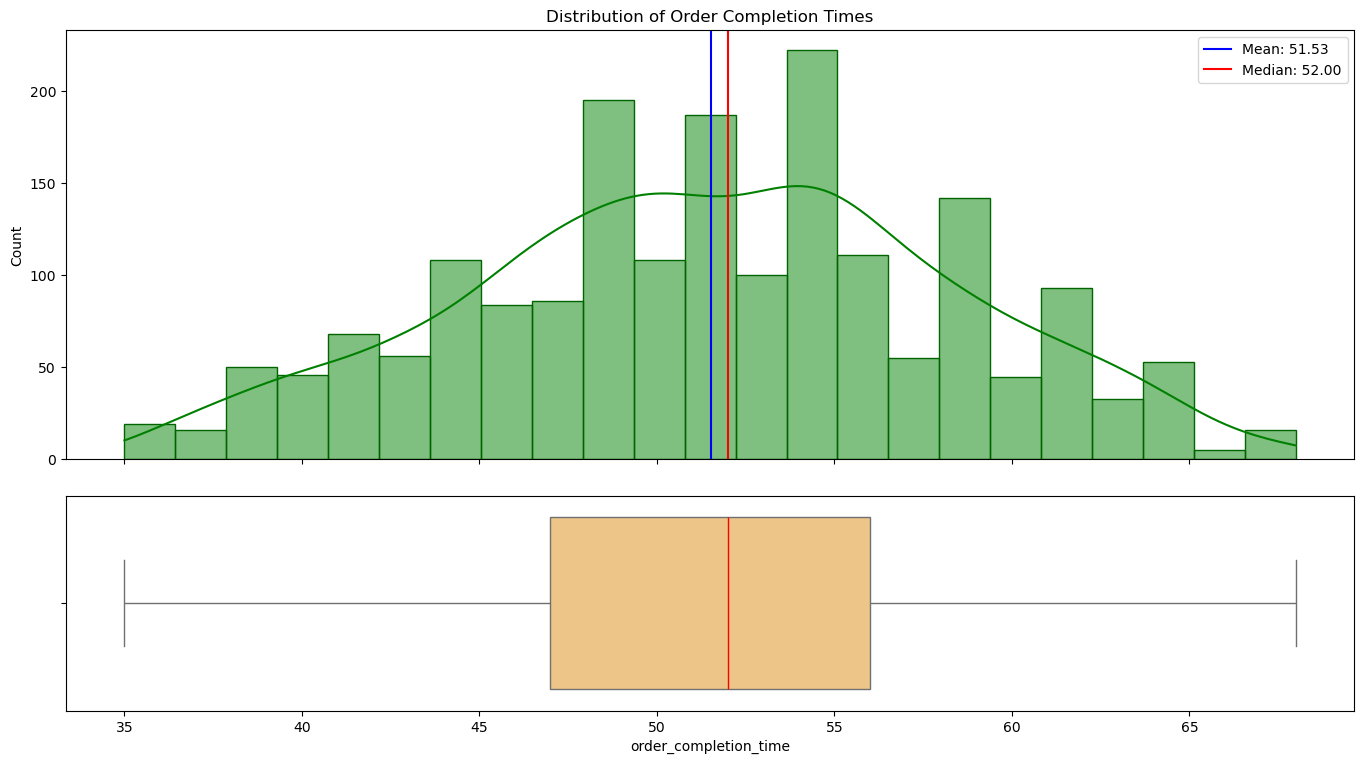

Mean: 51.53, Std: 6.83, Min: 35.00, Max: 68.00, Median: 52.00


In [3086]:
# Visualize the distribution of the 'order_completion_time' feature, identify potential outliers (IQR) and genertate key summary statistics
plot_histbox(df, "order_completion_time")

In [3087]:
# Filter data by the specified column and threshold
filtered_df = df[df["order_completion_time"] > 60]

# Percentage of orders with an order completion time greater 60 minutes
orders_perc_threshold = round(filtered_df.shape[0] / df.shape[0] * 100, 2)

print(
    f"Percentage of orders with 'order_completion_time' greater than 60 minutes: {orders_perc_threshold}%"
)

Percentage of orders with 'order_completion_time' greater than 60 minutes: 10.54%


**Observations**:
- The distribution is slightly left-skewed, with the mean lower than the median.
- Order completion time, the sum of food preparation and delivery time, ranges from 35.0 to 68.0 minutes, with an average time of 51.53 minutes and a standard deviation of approximately 6.83 minutes.
- 10.54% of orders take over 60 minutes from the time they are placed via the food aggregator platform.

### Multivariate Analysis

#### Columns | cuisine_type, cost_of_the_order

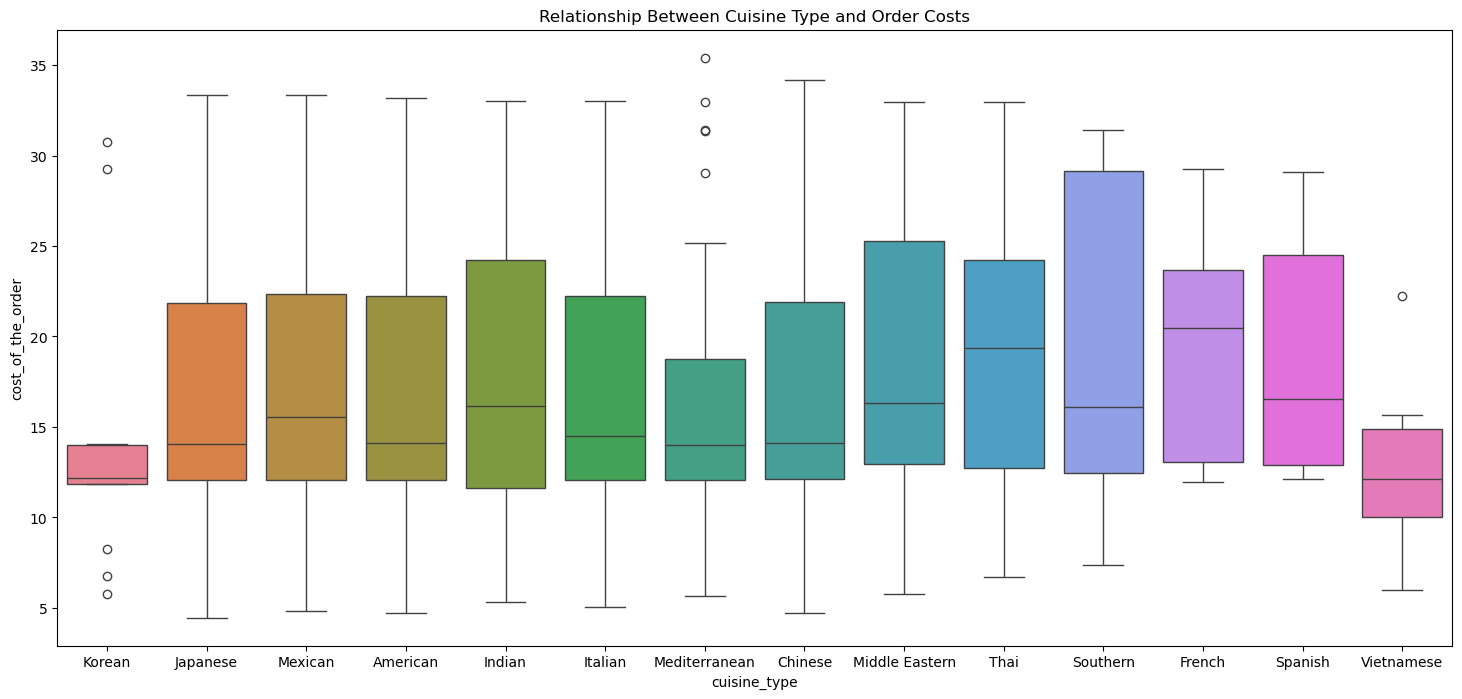

In [3088]:
# Visualize the relationship between the features 'cuisine_types' and 'rating' using boxplots
plt.figure(figsize=(18, 8))
sns.boxplot(data=df, x="cuisine_type", y="cost_of_the_order", hue="cuisine_type")
plt.title(f"Relationship Between Cuisine Type and Order Costs")
plt.show()

**Observations**:
- Korean and Vietnamese cuisines have the lowest median order costs and the least variability, with a small number of outliers.
- Southern cuisine exhibits the highest overall variability in order costs with several outliers.
- The top 5 cuisines (American, Japanese, Italian, Chinese, and Mexican/Indian) show similar trends, with median costs clustered around \\$15-\\$20.
- Skewness in order costs may reflect factors such as menu pricing strategies, ingredient costs, and restaurant location

#### Columns | cuisine_type, order_completion_time

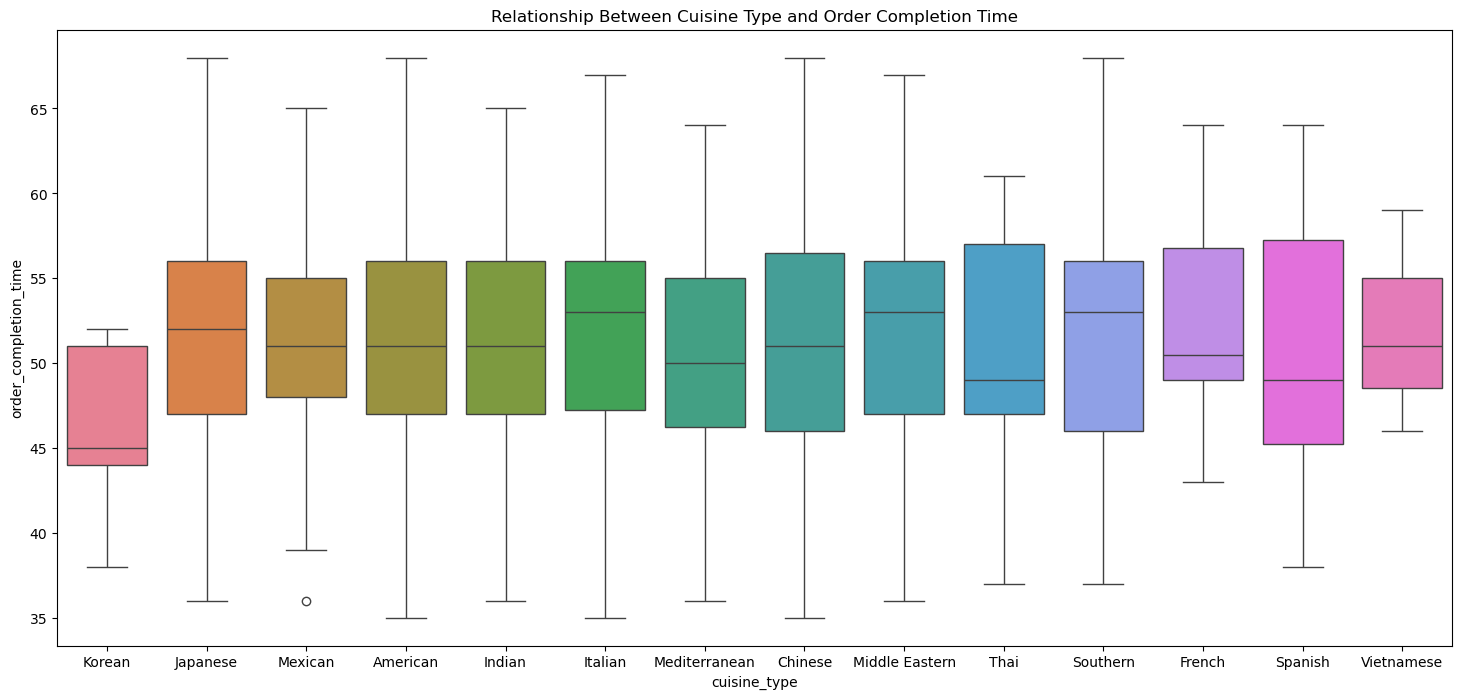

In [3089]:
# Visualize the relationship between the features 'cuisine_types' and 'order_completion_time' using boxplots
plt.figure(figsize=(18, 8))
sns.boxplot(data=df, x="cuisine_type", y="order_completion_time", hue="cuisine_type")
plt.title(f"Relationship Between Cuisine Type and Order Completion Time")
plt.show()

**Observations**:
- Korean cuisine has the lowest median order completion time and the least variability.
- Chinese, American and Southern cuisine exhibit higher variability in order completion times, with a wider interquartile range compared to other cuisines.
- The top 5 cuisines (American, Japanese, Italian, Chinese, and Mexican/Indian), show similar trends with median order completion times clustered around 50-55 minutes.
- Skewness may indicate external influences like restaurant efficiency, preparation time, and delivery logistics.

#### Columns | cuisine_type, rating

In [3090]:
# Calculate the number of ratings and the mean rating for each cuisine type
cuisine_ratings = df.groupby("cuisine_type")["rating"].agg(["count", "mean"]).round(2)

# Rename columns for clarity
cuisine_ratings.columns = ["counts_rating", "mean_rating"]

# Sort the DataFrame by mean_rating in descending order and reset the index
cuisine_ratings = cuisine_ratings.sort_values(by="mean_rating", ascending=False)

# Display DataFrame
cuisine_ratings.reset_index()

,cuisine_type,counts_rating,mean_rating
0,Spanish,6,4.83
1,Thai,9,4.67
2,Indian,50,4.54
3,Mexican,48,4.42
4,Japanese,273,4.37
5,Italian,172,4.36
6,Chinese,133,4.34
7,Southern,13,4.31
8,American,368,4.30
9,French,10,4.30


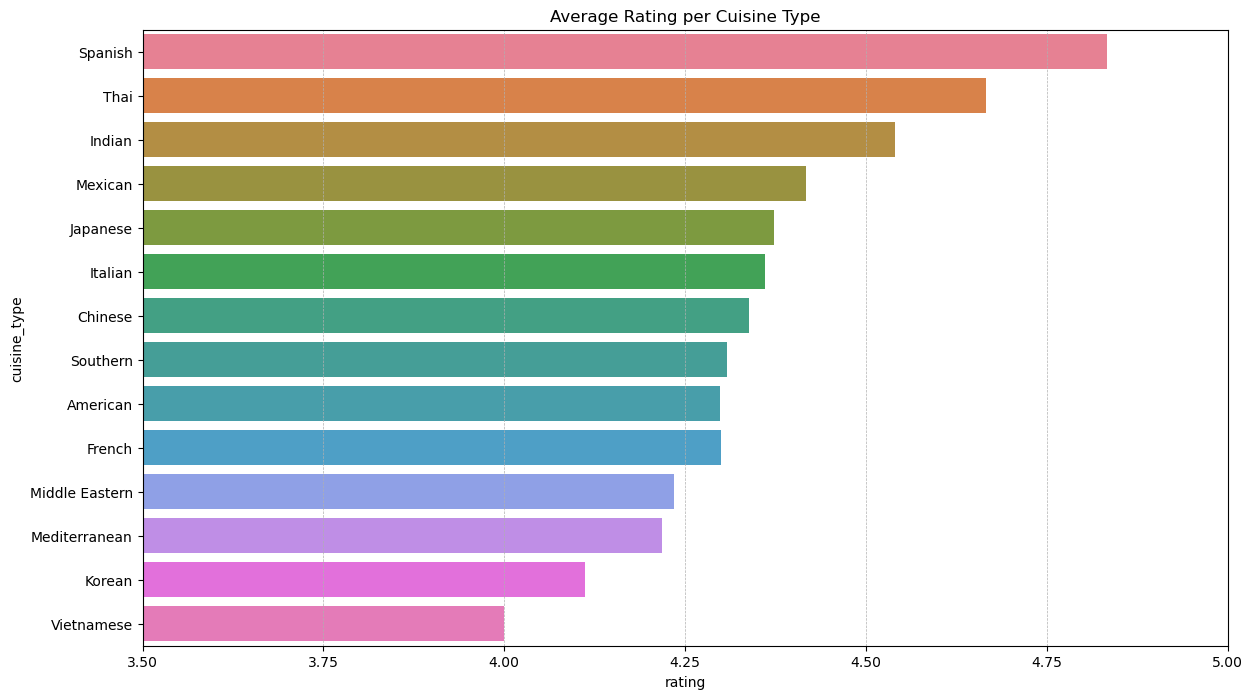

In [3091]:
# Visualize the distribution of the average rating per cuisine type
plt.figure(figsize=(14, 8))
sns.barplot(
    data=df,
    y="cuisine_type",
    x="rating",
    hue="cuisine_type",
    ci=False,
    order=cuisine_ratings.index,
    hue_order=cuisine_ratings.index,
)

# Set x-axis limits and ticks
plt.xlim(3.5, 5)
plt.xticks(np.arange(3.5, 5.25, 0.25))

# Add title and grid lines
plt.title("Average Rating per Cuisine Type")
plt.grid(axis="x", linestyle="--", linewidth=0.5)
plt.show()

**Observations**:
- Spanish cuisine has the highest mean rating at 4.83, while Vietnamese has the lowest at 4.00.
- Cuisines with higher ratings, such as Spanish and Thai, have relatively low counts (6 and 9, respectively), indicating higher uncertainty in their ratings.
- All cuisines with rating counts over 100 show similar average ratings, 4.30 to 4.37, suggesting consistent customer satisfaction among popular choices.

#### Columns | delivery_time, day_of_the_week, cuisine_type

In [3092]:
filtered_df = df.groupby(["day_of_the_week", "cuisine_type"])["delivery_time"]

# Group by and calculate mean, std, and count
fstats = filtered_df.agg(["mean", "std", "count"]).round(2).reset_index()

# Replace NaN values in 'std' with 0
fstats["std"].fillna(0, inplace=True)

# Calculate the standard error and the confidence intervals
confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)

fstats["sem"] = (fstats["std"] / np.sqrt(fstats["count"])).round(2)
fstats["ci"] = (z_score * fstats["sem"]).round(2)

# Separate data for weekdays and weekends
weekday_data = fstats[fstats["day_of_the_week"] == "Weekday"].reset_index(drop=True)
weekend_data = fstats[fstats["day_of_the_week"] == "Weekend"].reset_index(drop=True)

# Display the first 5 rows of each DataFrame
display(weekday_data.head(5))
display(weekend_data.head(5))

,day_of_the_week,cuisine_type,mean,std,count,sem,ci
6,Weekday,Korean,26.00,0.00,2,0.00,0.00
12,Weekday,Thai,26.50,3.70,4,1.85,3.63
2,Weekday,French,27.20,1.92,5,0.86,1.69
3,Weekday,Indian,27.62,2.79,24,0.57,1.12
13,Weekday,Vietnamese,27.67,3.51,3,2.03,3.98


,day_of_the_week,cuisine_type,mean,std,count,sem,ci
6,Weekend,Korean,20.00,3.66,11,1.10,2.16
10,Weekend,Southern,20.73,4.71,11,1.42,2.78
7,Weekend,Mediterranean,21.31,4.55,32,0.80,1.57
9,Weekend,Middle Eastern,21.75,5.29,32,0.94,1.84
1,Weekend,Chinese,22.27,4.40,163,0.34,0.67


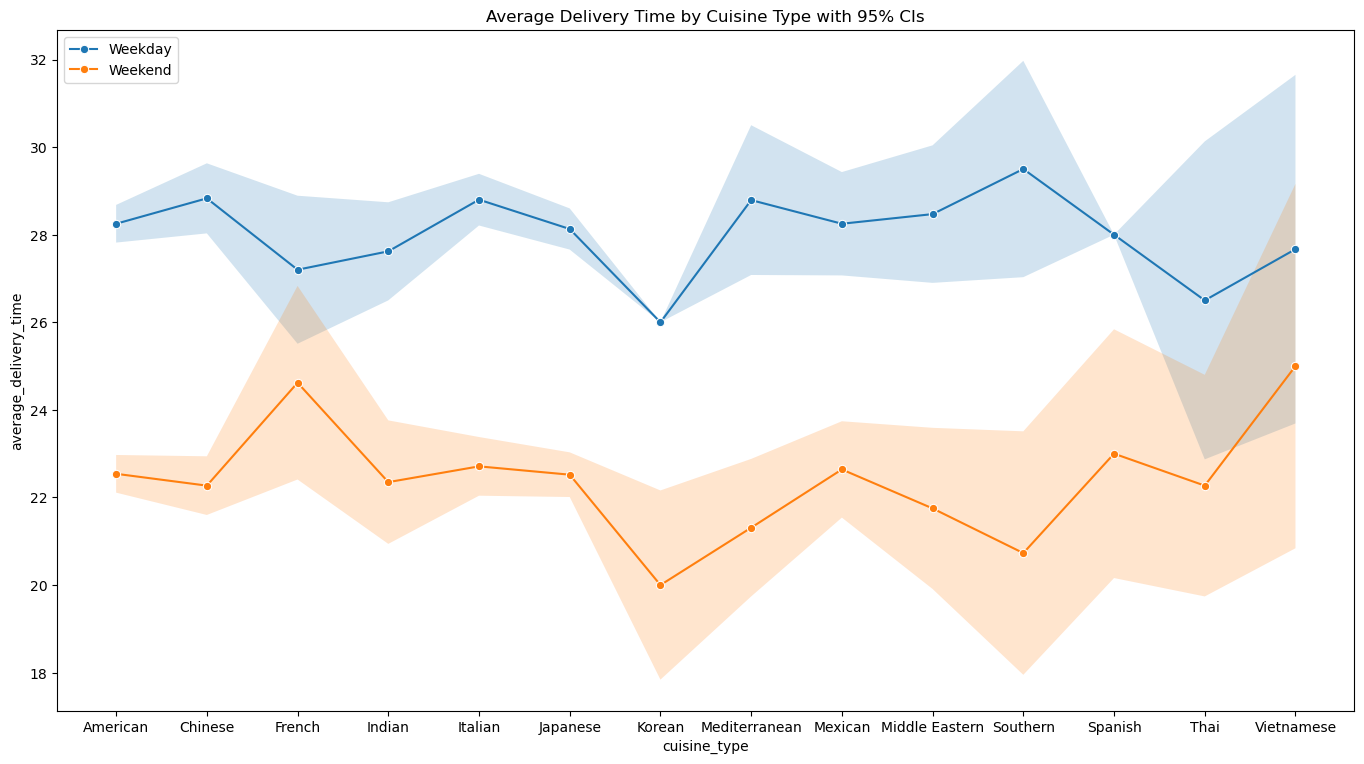

In [3093]:
# Initiate figure and set title
plt.figure(figsize=(14, 8))
plt.title(f"Average Delivery Time by Cuisine Type with 95% CIs")

# Weekday lineplot
sns.lineplot(data=weekday_data, x="cuisine_type", y="mean", marker="o", label="Weekday")
plt.fill_between(
    weekday_data["cuisine_type"],
    weekday_data["mean"] - weekday_data["ci"],
    weekday_data["mean"] + weekday_data["ci"],
    alpha=0.2,
)

# Weekend lineplot
sns.lineplot(data=weekend_data, x="cuisine_type", y="mean", marker="o", label="Weekend")
plt.fill_between(
    weekend_data["cuisine_type"],
    weekend_data["mean"] - weekend_data["ci"],
    weekend_data["mean"] + weekend_data["ci"],
    alpha=0.2,
)

# Add title and legend
plt.ylabel("average_delivery_time")
plt.xticks(rotation=0)
plt.legend(loc="upper left")
plt.tight_layout(pad=2.0)
plt.show()

**Observations**:
- **Faster Weekend Deliveries**: Average delivery times on weekends are significantly lower than on weekdays for nearly all cuisine types, indicating more efficient weekend operations.
- **High Consistency on Weekends**: Confidence intervals (CIs) for weekend delivery times are generally narrower than those for weekdays, especially for Indian, Chinese, and Mexican cuisines, suggesting more consistent weekend deliveries.
- **Delivery Time Range**: On weekends, the minimum average delivery time is for Korean cuisine, 20 minutes, while the maximum is for Vietnamese cuisine, 25 minutes. On weekdays, the minimum average delivery time is again for Korean cuisine, 26 minutes, while the maximum is for Southern cuisine, 29.5 minutes.
- **High Variability**: Cuisines such as French, Thai, Vietnamese, and Southern show higher variability in average delivery times on both weekdays and weekends, indicated by wider CIs, possibly pointing to inconsistencies in preparation or delivery processes for these cuisines.

#### Columns | restaurant_name, order_completion_time

In [3094]:
# Top 5 restaurants in terms of order completion time with a threshold of at least 10 deliveries
delivery_threshold = 10

# Filter restaurants with more than the specified number of deliveries
filtered_df = df.groupby("restaurant_name").filter(
    lambda x: len(x) > delivery_threshold
)

delivery_time = (
    filtered_df.groupby("restaurant_name")["order_completion_time"]
    .mean()
    .sort_values()
    .round(2)
    .head(5)
    .reset_index()
)
delivery_time.rename(columns={"order_completion_time": "average_order_completion_time"})

,restaurant_name,average_order_completion_time
0,Westville Hudson,47.40
1,Cafe Mogador,48.22
2,Five Guys Burgers and Fries,49.03
3,Blue Ribbon Sushi Bar & Grill,49.70
4,Chipotle Mexican Grill,49.87


In [3095]:
# Top 5 restaurants in terms of food preparation time with a threshold of at least 10 deliveries
delivery_threshold = 10

# Filter restaurants with more than the specified number of deliveries
filtered_df = df.groupby("restaurant_name").filter(
    lambda x: len(x) > delivery_threshold
)

delivery_time = (
    filtered_df.groupby("restaurant_name")["food_preparation_time"]
    .mean()
    .sort_values()
    .round(2)
    .head(5)
    .reset_index()
)
delivery_time.rename(columns={"food_preparation_time": "average_food_preparation_time"})

,restaurant_name,average_food_preparation_time
0,Cafe Mogador,25.28
1,Five Guys Burgers and Fries,25.62
2,Westville Hudson,25.67
3,Chipotle Mexican Grill,26.00
4,The Smile,26.11


In [3096]:
# Top 5 restaurants in terms of delivery time with a threshold of at least 10 deliveries
delivery_threshold = 10

# Filter restaurants with more than the specified number of deliveries
filtered_df = df.groupby("restaurant_name").filter(
    lambda x: len(x) > delivery_threshold
)

delivery_time = (
    filtered_df.groupby("restaurant_name")["delivery_time"]
    .mean()
    .sort_values()
    .round(2)
    .head(5)
    .reset_index()
)
delivery_time.rename(columns={"delivery_time": "average_delivery_time"})

,restaurant_name,average_delivery_time
0,Westville Hudson,21.73
1,Sushi of Gari,21.94
2,Hill Country Fried Chicken,22.64
3,Jack's Wife Freda,22.72
4,Otto Enoteca Pizzeria,22.92


**Observations**:

#### Columns | restaurant_name, cost_of_the_order

In [3097]:
# Top 5 restaurants in terms of total revenue
total_revenue = (
    df.groupby("restaurant_name")["cost_of_the_order"]
    .sum()
    .sort_values(ascending=False)
    .round(2)
    .head(5)
    .reset_index()
)
total_revenue.rename(columns={"cost_of_the_order": "total_revenue"})

,restaurant_name,total_revenue
0,Shake Shack,3579.53
1,The Meatball Shop,2145.21
2,Blue Ribbon Sushi,1903.95
3,Blue Ribbon Fried Chicken,1662.29
4,Parm,1112.76


**Observation:**
- The top 5 restaurants by total revenue are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm, with Shake Shack leading significantly at \\$3579.53.

#### Columns | restaurant_name, rating

In [3098]:
# Set thresholds for the number of ratings and average rating score
r_cnt_th = 25
r_avg_th = 4

# Group and filter by specified columns
rating_stats = df.groupby("restaurant_name")["rating"]

# Calculate rating count and average rating
rating_stats = rating_stats.agg(["count", "mean"]).round(2).reset_index()

# Rename columns
rating_stats.columns = ["restaurant_name", "rating_count", "average_rating"]

# Filter based on the given criteria
eligible_restaurants = rating_stats[
    (rating_stats["rating_count"] > r_cnt_th)
    & (rating_stats["average_rating"] > r_avg_th)
]

# Sort and reset index
eligible_restaurants = eligible_restaurants.sort_values(
    ascending=False, by="average_rating"
).reset_index(drop=True)

# Display the DataFrame | Restaurants that fulfill the criteria
eligible_restaurants

,restaurant_name,rating_count,average_rating
0,The Meatball Shop,84,4.51
1,TAO,28,4.36
2,Blue Ribbon Fried Chicken,64,4.33
3,Shake Shack,133,4.28
4,RedFarm Broadway,41,4.24
5,Blue Ribbon Sushi,73,4.22
6,RedFarm Hudson,34,4.18
7,Parm,39,4.13


**Observations**:
- Only 8 restaurants, representing 3.9%, meet the criteria of having over 25 ratings and an average rating greater than 4.
- These selected restaurants maintain high average ratings, indicating strong customer satisfaction among popular establishments.

#### Column | day_of_the_week, cost_of_the_order, food_preparation_time, delivery_time, order_completion_time

In [3099]:
# List of key numerical features of interest
key_features = [
    "cost_of_the_order",
    "food_preparation_time",
    "delivery_time",
    "order_completion_time",
]

# Calculate and display average and standard deviation of features per day of the week
fstatsmean(df, "day_of_the_week", key_features)

day_of_the_week cost_of_the_order       food_preparation_time        \
                               mean   std                  mean   std   
0         Weekday             16.31  7.48                 27.21  4.71   
1         Weekend             16.57  7.49                 27.44  4.60   

  delivery_time       order_completion_time        
           mean   std                  mean   std  
0         28.34  2.89                 55.55  5.57  
1         22.47  4.63                 49.91  6.62

**Observations**:
- **Cost and Food Preparation:** The average values remain stable with a slight increase on weekends, indicating consistent demand and operational efficiency.
- **Delivery and Completion Times:** Improved on weekends, suggesting improved in delivery logistics, overall operations and traffic conditions. Average delivery times are 26.1% longer and more variable on weekdays.

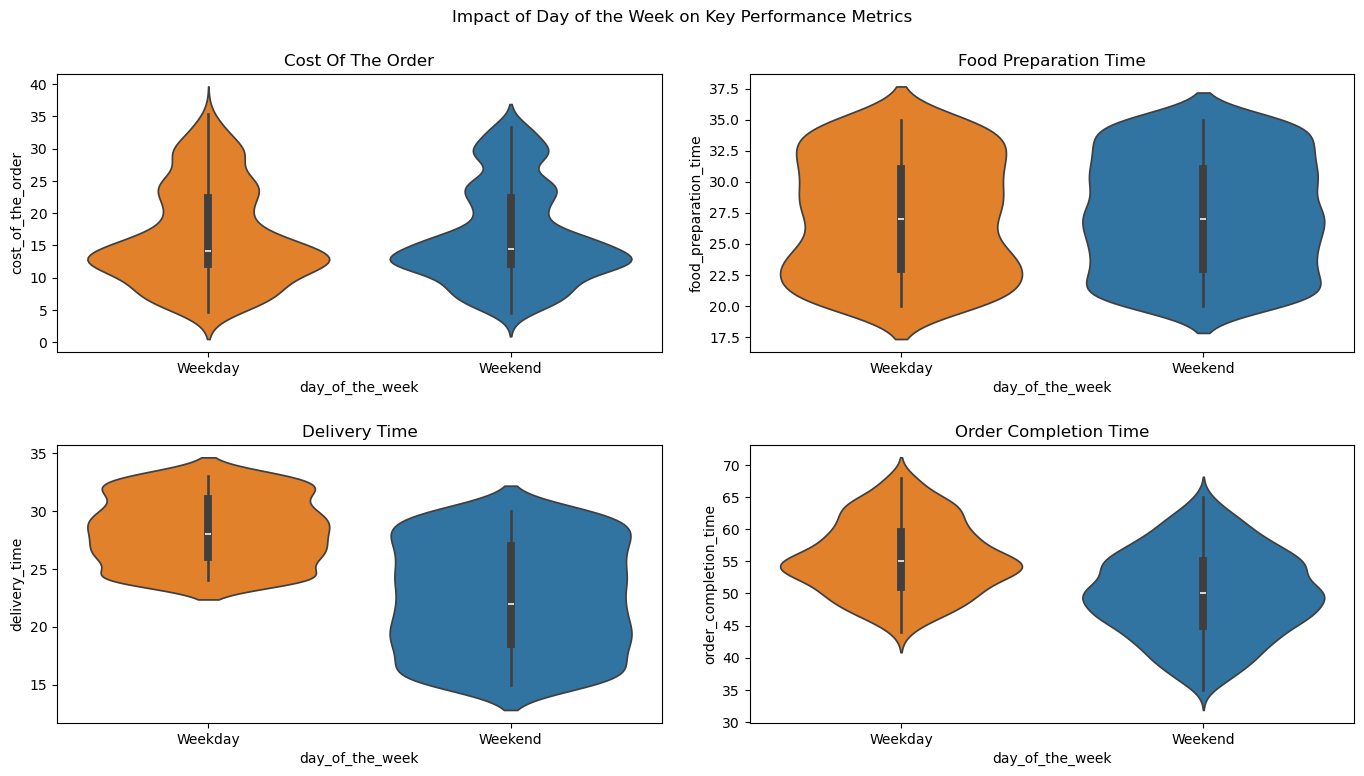

In [3100]:
# Initiate subplots and set title
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle("Impact of Day of the Week on Key Performance Metrics")

# Plot violin plots for each feature
for index, feature in enumerate(key_features):
    row = index // 2
    col = index % 2
    sns.violinplot(
        data=df,
        x="day_of_the_week",
        y=feature,
        hue="day_of_the_week",
        order=["Weekday", "Weekend"],
        ax=axs[row, col],
    )

    # Add title for each subplot
    formatted_title = feature.replace("_", " ").title()
    axs[row, col].set_title(formatted_title)

plt.tight_layout(pad=2.0)
plt.subplots_adjust(top=0.90)
plt.show()

**Observations**:
- **Cost of the Order**: Orders tend to have higher variability in cost on weekends, while weekdays see more consistent and stable order costs.
- **Food Preparation Time**: Food preparation times are generally longer and more variable on weekends compared to the shorter and more consistent times during weekdays.
- **Delivery Time**: Delivery times are longer and more variable on weekends, whereas they are shorter and more consistent on weekdays.
- **Order Completion Time**: Overall order completion times are higher and more spread out on weekends, in contrast to the more consistent and quicker completions during weekdays.

#### Columns | cost_of_the_order, food_preparation_time, delivery_time, order_completion_time

In [3101]:
# Calculate correlation matrix for numerical features
corr = df[num_cols[2:]].corr().round(2)

# Convert the correlation matrix into a DataFrame and rename the 'index' colum
corr_df = corr.reset_index().rename(columns={"index": "numerical_feature"})

# Display the correlation matrix
display(corr_df)

,numerical_feature,cost_of_the_order,food_preparation_time,delivery_time,order_completion_time
0,cost_of_the_order,1.00,0.04,-0.03,0.01
1,food_preparation_time,0.04,1.00,0.01,0.69
2,delivery_time,-0.03,0.01,1.00,0.74
3,order_completion_time,0.01,0.69,0.74,1.00


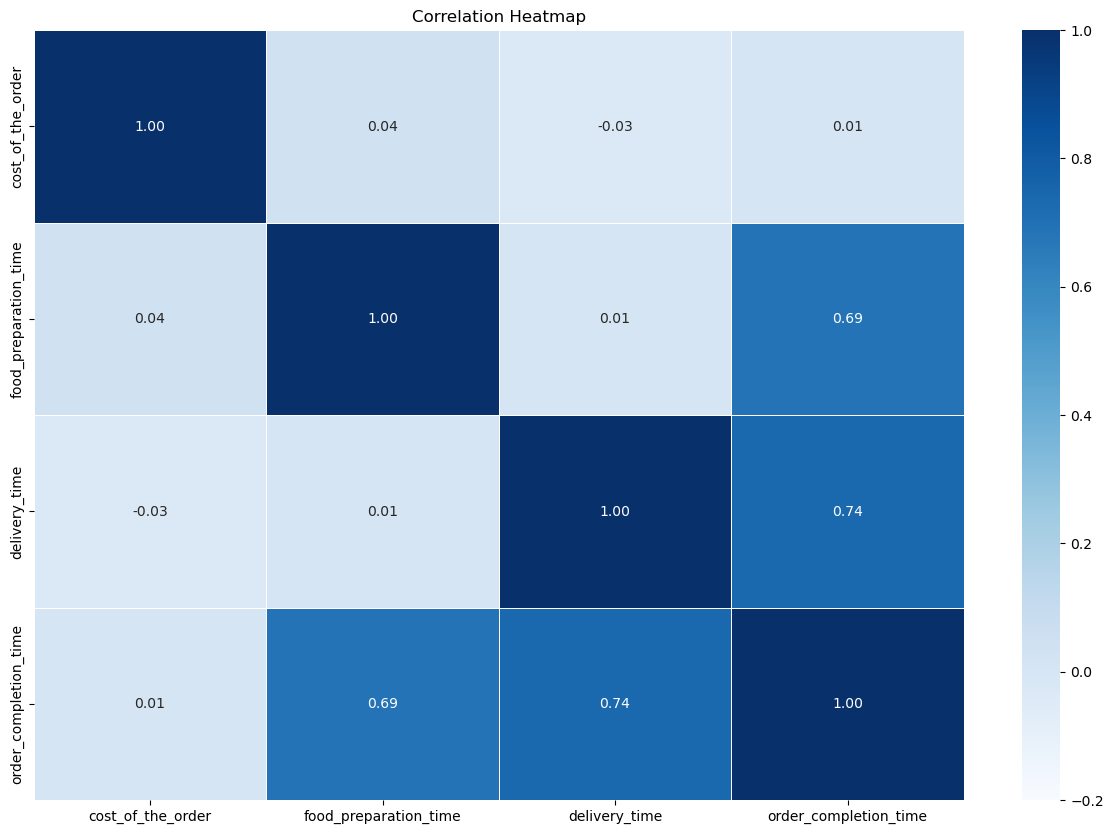

In [3102]:
# Plot the correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data=corr, annot=True, linewidths=0.5, fmt=".2f", vmin=-0.2, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

**Observations**:
- **Order Completion and Delivery Time**: Strong positive correlation, 0.74, indicating that increased delivery time significantly extends order completion time.
- **Order Completion and Food Preparation Time**: Moderate positive correlation, 0.69, suggesting longer food preparation times contribute to longer overall completion times.
- **Food Preparation and Delivery Time**: Almost no correlation, highlighting their independent processes.
- **Cost of the Order**: Shows very weak correlations with other features, indicating its relative independence from food preparation, delivery, and order completion times.


## In Progress

---

#### Total Net Revenue

In [3103]:
def net_revenue(x, uL, lL):
    if x > 20:
        return x * uL
    elif x > 5:
        return x * lL
    else:
        return 0


uL, lL = [0.25, 0.15]
df["net revenue"] = df["cost_of_the_order"].apply(net_revenue, args=(uL, lL))
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,order_completion_time,net revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,45,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,48,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,51,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,49,1.7385


In [3104]:
total_rev = df["net revenue"].sum()
print(
    f"The total revenue generated by the company across all orders amounts to {round(total_rev)} dollar."
)

The total revenue generated by the company across all orders amounts to 6166 dollar.


**Observations**:
- The food aggregator company generated a total revenue of \\$6166 from charging restaurants 25% on orders over \\$20 and 15% on orders over \\$5.

Business Implications:

	•	Resource Allocation: There may be a need for more resources (staff, kitchen capacity) on weekends to handle the higher variability and longer times in food preparation, delivery, and order completion.
	•	Customer Expectations: Set realistic expectations for customers about potentially longer wait times on weekends and consider implementing measures to improve efficiency during these peak times.
	•	Pricing Strategy: Given the higher variability in order costs on weekends, consider dynamic pricing or promotions to manage demand and optimize revenue.
	•	Operational Improvements: Analyze the reasons for longer preparation and delivery times on weekends and identify areas for operational improvements to streamline processes and reduce delays.